# Pandas Basics <hr style = "border:3px solid rgb(25, 212, 66)"></hr>

Data Analyst: Marchie S. Dawal <br>
Department: Electrical Engineering 

In [278]:
# %pip install pandas --upgrade

In [279]:
import pandas as pd

In [280]:
# %pip install matplotlib --upgrade 

In [281]:
import matplotlib.pyplot as plt

In [282]:
from scipy import stats

In [283]:
data = {
"name" : ["Blossom","Bubbles","Buttercup"],
"age" : [18, 19, 20],
"sex" : ["F", "F", "F"]
}

data

{'name': ['Blossom', 'Bubbles', 'Buttercup'],
 'age': [18, 19, 20],
 'sex': ['F', 'F', 'F']}

In [284]:
df = pd.DataFrame(data) 
df

,name,age,sex
0,Blossom,18,F
1,Bubbles,19,F
2,Buttercup,20,F


In [285]:
df["age"]

0    18
1    19
2    20
Name: age, dtype: int64

In [286]:
df["name"]

0      Blossom
1      Bubbles
2    Buttercup
Name: name, dtype: object

In [287]:
df["sex"]

0    F
1    F
2    F
Name: sex, dtype: object

In [288]:
df["age"].sum()

np.int64(57)

In [289]:
df["age"].mean()

np.float64(19.0)

In [290]:
df["age"].std()

np.float64(1.0)

# Correlation

In [291]:
measurements = {
    "Current" : [2, 3.5, 1.8,4.2,2.7],
    "Power" : [100, 200, 90, 210, 110]
}
measurements

{'Current': [2, 3.5, 1.8, 4.2, 2.7], 'Power': [100, 200, 90, 210, 110]}

In [292]:
device= pd.DataFrame(measurements) 
device

,Current,Power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [293]:
device.cov() 

,Current,Power
Current,1.023,56.15
Power,56.150,3370.00


In [294]:
device.corr()

,Current,Power
Current,1.000000,0.956306
Power,0.956306,1.000000


In [295]:
device.describe() 

,Current,Power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


## Scatter Plot 

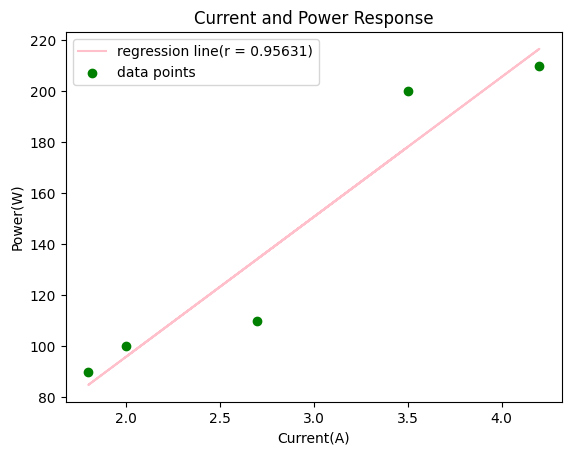

In [296]:
x = device["Current"] 
y = device["Power"] 

# regression line
m, b, r, p_value, std_err = stats.linregress(x,y)
line = m*x + b

plt.plot(x,line,
         color="pink",
         label=f"regression line(r = {r:.5f})")

# scatter
plt.scatter(x,y,
            color="green",
            label="data points")
plt.title("Current and Power Response")
plt.ylabel("Power(W)")
plt.xlabel("Current(A)")
plt.legend()
plt.show()

# Resistance Test

In [297]:
resistance = pd.read_csv (r"resistance-test (1).csv") 
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [298]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


In [309]:
jag_mean = resistance["Jaguar"].mean() 
jag_mean

np.float64(9.399999999999999)

In [301]:
pan_mean = resistance["Panther"].mean() 
pan_mean

np.float64(10.75)

In [302]:
resistance["Panther"] = resistance["Panther"].fillna(pan_mean)

In [303]:
resistance 

,Test No.,Jaguar,Panther
0,1,10.6,10.10
1,2,9.1,11.00
2,3,9.3,9.10
3,4,9.8,20.00
4,5,10.5,9.20
5,6,10.4,10.80
6,7,9.5,9.90
7,8,11.0,9.20
8,9,10.4,9.10
9,10,3.0,9.10


# Bar Graph 

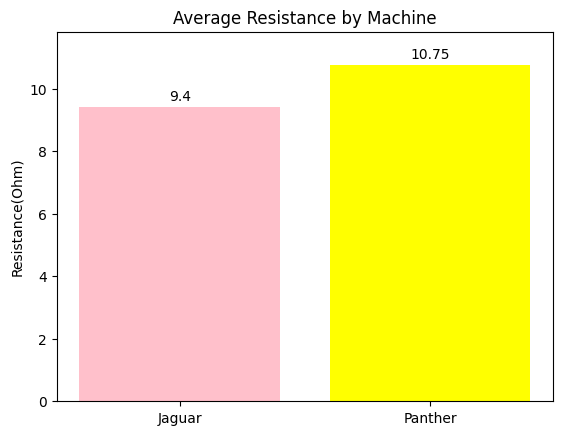

In [ ]:
bars = plt.bar(["Jaguar","Panther"],[jag_mean,pan_mean],
               color = ["pink","yellow"])
plt.title("Average Resistance by Machine")
plt.ylabel("Resistance(Ohm)")

# bar labels
plt.bar_label(bars, padding=3)
plt.margins(y=0.1) 
plt.show()